In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
import seaborn as sns


/Users/atefeh/miniconda3/envs/tf2/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Import CSV file
#pd.set_option('display.max_columns',None)
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,CreditMix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629163,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good


In [3]:
print(f'Shape of train datset : {train_df.shape}')
print(f'Shape of test datset : {test_df.shape}')
# In Test data we do not have 'Credit_Score' column.

Shape of train datset : (100000, 28)
Shape of test datset : (50000, 27)


In [3]:
# Split training dataset

def train_split(df):
    new_train , new_test = train_test_split(df , test_size=0.2 , random_state=42)
    return new_train.reset_index(drop=True) ,  new_test.reset_index(drop=True)


In [4]:
train_data , val_data = train_split(train_df)
print(f'Shape of train datset : {train_data.shape}')
print(f'Shape of test datset : {val_data.shape}')

Shape of train datset : (80000, 28)
Shape of test datset : (20000, 28)


In [5]:
# Create a copy of train data
train_data_copy = train_data.copy()
val_data_copy = val_data.copy()

In [3]:
train_data_copy = train_df.copy()

In [4]:
# Glance at Data
categorical_col = train_data_copy.select_dtypes(include='O')
for column in categorical_col:
    print(train_data_copy[column].value_counts())
    print('*'*50)

ID
0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: count, Length: 100000, dtype: int64
**************************************************
Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: count, Length: 12500, dtype: int64
**************************************************
Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64
**************************************************
Name
Langep            44
Stevex            44
Vaughanl          39
Jessicad          39
Raymondr          38
                  ..
Alina Selyukhg     4
Habboushg          4
Mortimerq          4
Ronaldf            4
Timothyl           3
Name: count, Lengt

Based on this information, it appears that every 8 rows correspond to a single Customer_ID from January to August. Therefore, the following columns should contain consistent information for each Customer_ID:

- Name   
- Age
- Occupation
- Annual Income
- Outstanding Debt
- Credit Mix
- Credit History Age

When addressing missing values or identifying unusual entries, it’s important to pay close attention to these columns to ensure the integrity of the data.

In [5]:
train_data_copy.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
ChangedCreditLimit           2091
Num_Credit_Inquiries         1965
CreditMix                   20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              1209
Credit_Score                    0
dtype: int64

### Data Processing


In [6]:
train_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                92938 non-null   object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [7]:
# Convert the "Credit_History_Age" column from the format "XX Years and YY Months" to total months.
# Function to convert "XX Years and YY Months" to total months
def convert_to_months(value):
    if pd.notnull(value):  # Check if the value is not Non value
        years = int(value.split(' ')[0])  # Extract the number of years
        months = int(value.split(' ')[3])  # Extract the number of months
        return (years * 12)+months  # Calculate total months
    else:
        return value  # Return 0 or handle NaN/float values as needed

train_data_copy['Credit_History_Age'] = train_data_copy['Credit_History_Age'].apply(convert_to_months)

In [8]:
# Detect strange values # Clean up values : removing any unwanted characters 
# For example for Age column it represent like _32 instead of 32.
featute_to_clean=['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Outstanding_Debt']
def clean_ (data):
    for column in featute_to_clean:
        data[column]=data[column].str.replace(r'[_]', '', regex=True)# removes underscores only
    return data    
train_data_copy = clean_(train_data_copy)


In [9]:
# Change column type
# Fixing a data type 
# Some columns wrongly represent as Object. Let's convert them to float.

num_feature = ['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Outstanding_Debt','Amount_invested_monthly',
               'Monthly_Balance']

def fixing_dtype (data):
    
    for column in num_feature:
        data[column]=data[column].astype('float64')
    return data    

train_data_copy=fixing_dtype(train_data_copy)

In [10]:
# Convert 'Month' to datetime
train_data_copy['Month'] = pd.to_datetime(train_data_copy.Month, format='%B').dt.month

# Drop ['Name', 'ID', 'SSN']
train_data_copy = train_data_copy.drop(['Name', 'ID', 'SSN'], axis=1)


In [11]:
# In the 'Type_of_Loan' column, there are several categories, some of which include multiple loan types, such as 'Mortgage Loan and Personal Loan'
# To simplify the data, we will consolidate these categories into a single label: 'Multiple Loan.'


# Fill NaN values with 'Not Specified' 
train_data_copy['Type_of_Loan'] = train_data_copy['Type_of_Loan'].fillna('Not Specified')

# Apply the condition to mark rows with multiple loans
train_data_copy['Type_of_Loan'] = train_data_copy['Type_of_Loan'].where(
    ~train_data_copy['Type_of_Loan'].str.contains(','), 'Multiple Loan'
)

In [12]:
#train_data_copy = train_data_copy.drop(['Name', 'ID', 'SSN'], axis=1)
## Filling Missing Value with mode of each group

for customer_id, group in train_data_copy.groupby('Customer_ID'):
    for col in group.columns:
        if group[col].isnull().any():
            if col in ['Monthly_Balance', 'Amount_invested_monthly']:
                # Fill with mean of the column within the group and reassign
                train_data_copy.loc[group.index, col] = group[col].fillna(group[col].mean())
            else:
                # Fill with mode (most frequent value) only if mode is available
                mode_val = group[col].mode()
                if not mode_val.empty:  # Check if mode exists
                    train_data_copy.loc[group.index, col] = group[col].fillna(mode_val.iloc[0])

In [13]:
train_data_copy.isnull().sum()

Customer_ID                 0
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
ChangedCreditLimit          0
Num_Credit_Inquiries        0
CreditMix                   0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [14]:
pd.set_option('display.float_format', '{:.2f}'.format)

train_data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,100000.00,4.50,2.29,1.00,2.75,4.50,6.25,8.00
Age,100000.00,110.58,685.84,-500.00,24.00,33.00,42.00,8698.00
Annual_Income,100000.00,176415.70,1429618.05,7005.93,19457.50,37578.61,72790.92,24198062.00
Monthly_Inhand_Salary,100000.00,4198.35,3187.40,303.65,1626.76,3095.98,5961.64,15204.63
Num_Bank_Accounts,100000.00,17.09,117.40,-1.00,3.00,6.00,7.00,1798.00
Num_Credit_Card,100000.00,22.47,129.06,0.00,4.00,5.00,7.00,1499.00
Interest_Rate,100000.00,72.47,466.42,1.00,8.00,13.00,20.00,5797.00
Num_of_Loan,100000.00,3.01,62.65,-100.00,1.00,3.00,5.00,1496.00
Delay_from_due_date,100000.00,21.07,14.86,-5.00,10.00,18.00,28.00,67.00
Num_of_Delayed_Payment,100000.00,29.69,218.03,-3.00,9.00,14.00,18.00,4397.00


- Based on the data presented in this table, we have identified several outliers.

- Additionally, there appears to be an error in the dataset; for instance, one entry indicates an individual is 8,698 years old, which is clearly implausible.

In [15]:
train_data_copy[train_data_copy['Age']==8698.00]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,CreditMix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
71732,CUS_0x3909,5,8698.00,Entrepreneur,17423.69,1707.97,6,5,15,0.00,...,Standard,1158.96,34.35,378.00,Yes,0.00,132.02,Low_spent_Large_value_payments,308.77,Standard


if we check Customer_ID:

In [16]:
train_data_copy[train_data_copy['Customer_ID']=='CUS_0x3909']

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,CreditMix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
71728,CUS_0x3909,1,32.00,Entrepreneur,17423.69,1707.97,6,5,15,-100.00,...,Standard,1158.96,40.41,374.00,Yes,0.00,210.76,Low_spent_Small_value_payments,250.04,Standard
71729,CUS_0x3909,2,33.00,Entrepreneur,17423.69,1707.97,6,5,15,0.00,...,Standard,1158.96,36.91,375.00,Yes,0.00,119.34,Low_spent_Small_value_payments,341.46,Standard
71730,CUS_0x3909,3,33.00,Entrepreneur,17423.69,1707.97,6,5,15,33.00,...,Standard,1158.96,35.73,376.00,Yes,0.00,26.16,High_spent_Large_value_payments,384.64,Standard
71731,CUS_0x3909,4,33.00,Entrepreneur,17423.69,1707.97,6,5,15,0.00,...,Standard,1158.96,27.66,377.00,NM,0.00,161.18,Low_spent_Medium_value_payments,289.62,Standard
71732,CUS_0x3909,5,8698.00,Entrepreneur,17423.69,1707.97,6,5,15,0.00,...,Standard,1158.96,34.35,378.00,Yes,0.00,132.02,Low_spent_Large_value_payments,308.77,Standard
71733,CUS_0x3909,6,33.00,Entrepreneur,17423.69,1707.97,6,5,15,0.00,...,Standard,1158.96,34.25,379.00,Yes,0.00,155.45,Low_spent_Medium_value_payments,295.35,Standard
71734,CUS_0x3909,7,33.00,Entrepreneur,17423.69,1707.97,6,5,15,0.00,...,Standard,1158.96,37.66,380.00,Yes,0.00,69.29,Low_spent_Small_value_payments,391.51,Standard
71735,CUS_0x3909,8,33.00,Entrepreneur,17423.69,1707.97,6,5,15,0.00,...,Standard,1158.96,31.01,381.00,Yes,0.00,136.02,Low_spent_Large_value_payments,304.78,Standard


The age of this customer is actually 33 years old. We need to correct the erroneous value in the dataset and replace it with the accurate information.

In [17]:
import pandas as pd

def replace_with_mode(df, group_col, target_col):
    # Iterate through each group
    for id, group in df.groupby(group_col):
        for col in target_col:
            
            # Calculate the mode for the target column within the group
            mode_val = group[col].mode()
            
            # If mode_val is not empty, replace values in the target column with the mode
            if not mode_val.empty:
                mode_value = mode_val[0]  # Get the first mode value
                # Replace all values in the group for the target column with the mode
                df.loc[df[group_col] == id, col] = mode_value
    return df

# Call the function
train_data_copy = replace_with_mode(train_data_copy,'Customer_ID', 
        target_col=['Age','Occupation','Annual_Income','Monthly_Inhand_Salary',
                    'Interest_Rate','Credit_History_Age',
                    'Num_Bank_Accounts','Num_Credit_Card','Num_of_Loan'])

In [18]:
train_data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,100000.00,4.50,2.29,1.00,2.75,4.50,6.25,8.00
Age,100000.00,33.27,10.76,14.00,24.00,33.00,42.00,56.00
Annual_Income,100000.00,50505.12,38299.42,7005.93,19342.97,36999.71,71683.47,179987.28
Monthly_Inhand_Salary,100000.00,4197.33,3186.92,303.65,1626.72,3092.27,5958.70,15204.63
Num_Bank_Accounts,100000.00,5.37,2.59,-1.00,3.00,5.00,7.00,10.00
Num_Credit_Card,100000.00,5.53,2.07,0.00,4.00,5.00,7.00,11.00
Interest_Rate,100000.00,14.53,8.74,1.00,7.00,13.00,20.00,34.00
Num_of_Loan,100000.00,3.53,2.45,0.00,2.00,3.00,5.00,9.00
Delay_from_due_date,100000.00,21.07,14.86,-5.00,10.00,18.00,28.00,67.00
Num_of_Delayed_Payment,100000.00,29.69,218.03,-3.00,9.00,14.00,18.00,4397.00


In [ ]:
# there is negative value for Num_Bank_Accounts , Num_of_Loan , Delay_from_due_date, Num_of_Delayed_Payment, ChangedCreditLimit,Age
# Let's replace them

train_data_copy.loc[train_data_copy['Num_Bank_Accounts']<0 ,'Num_Bank_Accounts'] = 0
train_data_copy.loc[train_data_copy['Num_of_Loan']<0 ,'Num_of_Loan'] = 0


In [24]:
# Final Dataset after applying all data cleaning
train_data_copy.to_csv("clean_credit_score_train.csv", index=False)

In [22]:
#clean_credit_score_train = pd.read_csv('clean_credit_score_train.csv')
#clean_credit_score_train=clean_credit_score_train.dropna()

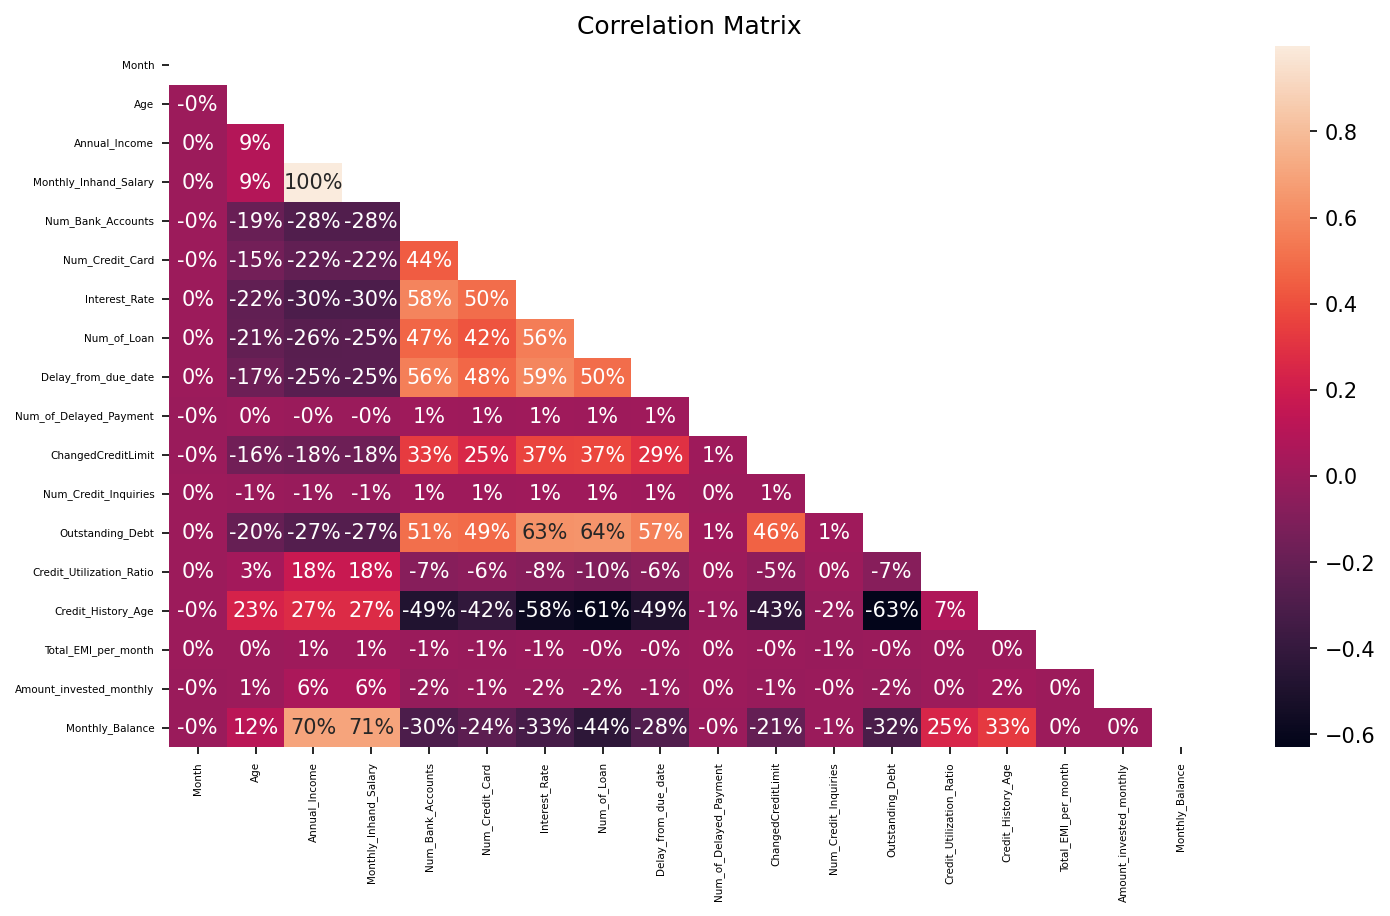

In [25]:
import matplotlib.pylab as plt
corr = train_data_copy.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

fig = plt.figure(figsize=(10, 6), dpi=150)

sns.heatmap(corr, annot=True, mask=mask, fmt=".0%", annot_kws={"size":10})
plt.grid(False)
plt.tick_params(axis="both", labelsize=5)
plt.tight_layout()
plt.title("Correlation Matrix")
plt.show()

In [26]:
from scipy.stats.contingency import chi2_contingency
from sklearn.feature_selection import chi2, SelectKBest, f_classif

def chi_2_test(df:pd.DataFrame):
    df_copy = train_data_copy
    cat_cols = df_copy.select_dtypes(exclude="number").columns.drop(["Customer_ID", "Credit_Score"])
    numb_columns = df_copy.select_dtypes(include="number").columns.drop("Month")

    summary = np.empty((len(cat_cols)+len(numb_columns), 3), dtype="object")
    y, *_ = df_copy["Credit_Score"].factorize(sort=False)

    def perform_test(*args, test):

        if test == "chi2":
            for i, col in enumerate(args[0]):
                cross = pd.crosstab(index=df[col], columns=[df["Credit_Score"]])
                t_stat, pvalue, *_ = chi2_contingency(cross)
                summary[i, :] = [col, t_stat, pvalue]

        elif test=="f_classif":
            for i, col in enumerate(args[0], start=len(summary)-len(args[0])):
                t_stat, pvalue = f_classif(df_copy[[col]], y.reshape(-1, 1))
                summary[i, :] = [col, t_stat[0], pvalue[0]]

    perform_test(cat_cols, test="chi2")
    perform_test(numb_columns, test="f_classif")

    return pd.DataFrame(
        data=summary,
        columns=["column", 't-statistic', "p-value"]
    )

In [27]:
chi2_summary = chi_2_test(train_data_copy).sort_values(by="t-statistic", ascending=False)

chi2_summary.style.bar("t-statistic").background_gradient(
    "Blues", subset="t-statistic")

/Users/atefeh/miniconda3/envs/tf2/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/atefeh/miniconda3/envs/tf2/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/atefeh/miniconda3/envs/tf2/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/atefeh/miniconda3/envs/tf2/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was 

,column,t-statistic,p-value
2,CreditMix,40489.417662,0.000000
3,Payment_of_Min_Amount,19620.394791,0.000000
10,Interest_Rate,15420.276171,0.000000
12,Delay_from_due_date,11471.888723,0.000000
9,Num_Credit_Card,9771.833777,0.000000
8,Num_Bank_Accounts,9277.920577,0.000000
16,Outstanding_Debt,9115.496701,0.000000
18,Credit_History_Age,8888.736595,0.000000
11,Num_of_Loan,7440.631240,0.000000
1,Type_of_Loan,5519.441927,0.000000


In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score


In [55]:
# Initialize CatBoostClassifier
from catboost import CatBoostClassifier, Pool

from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

Y = train_data_copy['Credit_Score']
X = train_data_copy.drop(['Credit_Score','Customer_ID'],axis=1)


cat_features = train_data_copy.select_dtypes(include='O').drop(['Credit_Score','Customer_ID'],axis=1)

# Assuming X and Y are defined as in your code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Convert categorical columns to indices
cat_features_indices = [X_train.columns.get_loc(col) for col in cat_features.columns]

# Define the model
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    eval_metric= "Accuracy",
    max_bin = 100,
    auto_class_weights = 'Balanced',
    verbose=500)


# Train the model
model.fit(
    X_train,
    y_train,
    cat_features=cat_features_indices,
    eval_set=(X_test, y_test),
    plot=True
)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7120219	test: 0.7075540	best: 0.7075540 (0)	total: 69ms	remaining: 1m 8s
500:	learn: 0.7834077	test: 0.7614937	best: 0.7615500 (487)	total: 25.4s	remaining: 25.3s
999:	learn: 0.8207396	test: 0.7850149	best: 0.7850149 (999)	total: 53.3s	remaining: 0us

bestTest = 0.7850149343
bestIteration = 999



                     Feature  Importance
15          Outstanding_Debt       12.22
14                 CreditMix       10.31
0                      Month        8.38
7              Interest_Rate        8.02
17        Credit_History_Age        6.72
12        ChangedCreditLimit        5.94
10       Delay_from_due_date        5.65
1                        Age        5.30
6            Num_Credit_Card        4.88
19       Total_EMI_per_month        4.38
4      Monthly_Inhand_Salary        3.95
3              Annual_Income        3.70
5          Num_Bank_Accounts        3.30
13      Num_Credit_Inquiries        3.21
11    Num_of_Delayed_Payment        2.89
8                Num_of_Loan        2.71
21         Payment_Behaviour        2.03
22           Monthly_Balance        1.48
2                 Occupation        1.36
20   Amount_invested_monthly        1.23
9               Type_of_Loan        1.00
18     Payment_of_Min_Amount        0.71
16  Credit_Utilization_Ratio        0.64


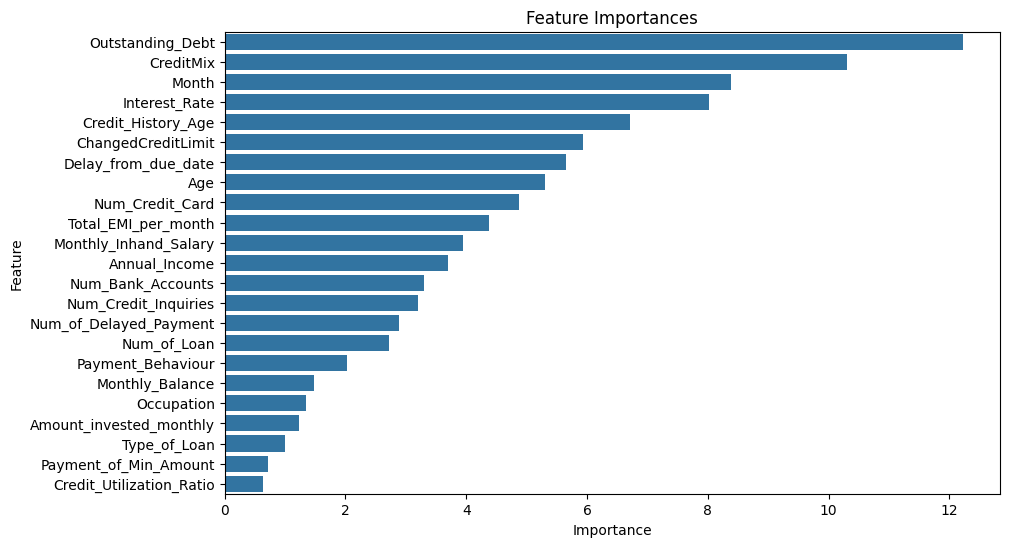

In [69]:
# After training the model
feature_importances = model.get_feature_importance()
feature_names = X.columns

# Combine feature names with their importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top features
print(feature_importance_df)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()


Accuracy: 74.49%
Accuracy: 74.49%
F1 Score: {'Good': '69.90%', 'Poor': '76.38%', 'Standard': '75.41%'}
Precision Score: {'Good': '57.98%', 'Poor': '72.01%', 'Standard': '87.58%'}
Recall Score: {'Good': '88.01%', 'Poor': '81.32%', 'Standard': '66.20%'}



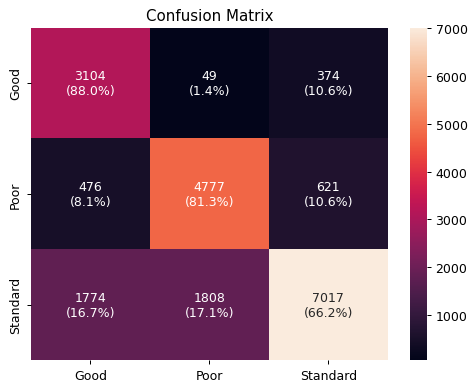

In [74]:
# Make predictions
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, roc_auc_score, roc_curve, auc, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

y_hat = model.predict(X_test)
acc_score = accuracy_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat, average=None)
precision = precision_score(y_test, y_hat, average=None)
recall = recall_score(y_test, y_hat, average=None)

print(f"Accuracy: {acc_score:.2%}\n\
F1 Score: {dict(zip(model.classes_, map(lambda x: f'{x:.2%}', f1)))}\n\
Precision Score: {dict(zip(model.classes_, map(lambda x: f'{x:.2%}', precision)))}\n\
Recall Score: {dict(zip(model.classes_, map(lambda x: f'{x:.2%}', recall)))}\n\
")


cm = confusion_matrix(y_test, y_hat)
cm_norm = confusion_matrix(y_test, y_hat, normalize="true")
annot = np.array([f"{i}\n({g:.1%})" for i, g in zip(cm.flatten(), cm_norm.flatten())])
annot = annot.reshape(cm.shape)

fig = plt.figure(dpi=90)
sns.heatmap(cm, annot=annot, fmt="", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.show()

In [79]:
from joblib import dump

dump(model, 'model.joblib')


['model.joblib']